<a href="https://colab.research.google.com/github/dharmendra-chouhan/s2datascience/blob/master/Extracted_Construction_Worker_Patient_Details_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Construction Worker Patient Details data Profiling

2. Age range wise Patient

3. Age Group wise Registration

4. Age wise Registration Details Count

5. District wise Patients that take alcohol,smoking,tobaco,drug

6. Function for age groups wise Generate csv file

7. Generate CSV file selecte min and max age

8. Construcution Worker's Health Data - District wise gender data

9. Droping data from datafram "Age between 100 to 930"

10. District wise

       Gender wise Registration
       Health status wise Registration
       District wise Registration
       District wise Camp

11. District wise Maximum/Minimum Registration Count

12. District and health status wise data

13. Disease Result

14. Gender wise Disease Result 


In [0]:
import pandas as pd

# **Extracted Construction Worker Patient Details Files**
Construcution Worker's Health Data Analysis
---




**Read a csv file from a Google drive**

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1G9LdZeCed2psskC9MLuORz3tA9mkN_-M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ExtractedConstructionWorkerPatient.csv')  

#3. Read file as panda dataframe
import pandas as pd
df1 = pd.read_csv('ExtractedConstructionWorkerPatient.csv') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Columns of the Extracted Construction Worker Patient Details Files:**

In [0]:
print(df1.columns)

Index(['campid', 'campno', 'camplocation', 'campdate', 'distlgdcode',
       'distname', 'regdid', 'regdno', 'regdno_audio', 'fullname',
       'fullname_audio', 'mobile', 'mobile_audio', 'age', 'age_audio',
       'gender', 'gender_audio', 'docremark', 'health_status', 'bmi',
       'weight_kgs', 'height_cms', 'bloodsugar_f', 'bloodsugar_pp',
       'bloodsugar_r', 'pulserate', 'testid', 'testname', 'right_remark',
       'left_remark', 'testname_lft', 'fev1', 'fevi_fvc', 'pef', 'fef_25_75',
       'fivc', 'pif', 'fet', 'result', 'diseaseid', 'diseasename',
       'disease_status', 'campdate_ph', 'distlgdcode_ph', 'isalcohol',
       'issmoking', 'istobaco', 'isdrug', 'phy_exam_testid',
       'phy_exam_testname', 'phy_exam_remark', 'testid_vi', 'testname_vi',
       'diesease_injury_evidence_right_vi', 'diesease_injury_evidence_left_vi',
       'other_remark_vi', 'suggestion_vi', 'finalremark_vi',
       'wearingglasses_vi', 'leftremark_vi', 'rightremark_vi',
       'nearvisionremark

**Description of Dataset**

   . This Data set contains total 62 Columns and total 632947 Construction Worker Patient Details (row)


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632948 entries, 0 to 632947
Data columns (total 62 columns):
campid                               632948 non-null int64
campno                               632938 non-null object
camplocation                         632938 non-null object
campdate                             632948 non-null object
distlgdcode                          632948 non-null int64
distname                             632948 non-null object
regdid                               632948 non-null int64
regdno                               632948 non-null int64
regdno_audio                         632948 non-null int64
fullname                             632946 non-null object
fullname_audio                       632946 non-null object
mobile                               527212 non-null float64
mobile_audio                         527212 non-null float64
age                                  632946 non-null float64
age_audio                            632946 non-nul

**Print first five Record from datafram**

In [0]:
df1.head(5)

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,regdno_audio,fullname,fullname_audio,mobile,mobile_audio,age,age_audio,gender,gender_audio,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
2,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,131380003406,Manisha Suhas Nikam,Manisha Suhas Nikam,9.967911e+09,9.967911e+09,35.0,35.0,F,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,9.0,Congenital Abnormality,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
3,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,1.0,Asthama,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
4,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,131390043378,Amruta Sambhaji Shingate,Amruta Sambhaji Shingate,9.923967e+09,9.923967e+09,29.0,29.0,F,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,5,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,10.0,Gastrointestinal Ulcer,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision


**Describe all Construction Worker Patient Details data**

In [0]:
df1.describe(include='all')

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,regdno_audio,fullname,fullname_audio,mobile,mobile_audio,age,age_audio,gender,gender_audio,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
count,632948.000000,632938,632938,632948,632948.000000,632948,632948.000000,6.329480e+05,6.329480e+05,632946,632946,5.272120e+05,5.272120e+05,632946.000000,632946.000000,632946,632946,550675,632948,6.328240e+05,632824.000000,632824.000000,578375.000000,624115.000000,60722.000000,0.0,632948.0,632948,632948,632948,632927,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600,631468.000000,631468,631468,627698,627698.000000,627642,627642,627642,627642,632938.0,632938,632938,631584.0,631584,631584,631584,2158,39193,631584.000000,631584,566399,592391,566515
unique,NaN,705,604,145,NaN,35,NaN,NaN,NaN,60695,60695,NaN,NaN,NaN,NaN,2,2,2883,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,10,2,145,NaN,2,2,2,2,NaN,1,5,NaN,1,11,11,14,2,NaN,2,15,4,3
top,NaN,CAMP_478_0000010,Parbhani - Hingoli Rd| Limbala makta| Maharash...,2019-09-09,NaN,NAGPUR,NaN,NaN,NaN,Rakesh Kumar,Rakesh Kumar,NaN,NaN,NaN,NaN,M,M,nil,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,NaN,Diabetes,NO,09-Sep-19,NaN,NO,NO,NO,NO,NaN,Physical Examination,Normal,NaN,Vision Screening,Normal,Normal,normal,NIL,NaN,No,Normal Vision,Normal Vision,Normal Vision
freq,NaN,5290,13209,17891,NaN,82615,NaN,NaN,NaN,200,200,NaN,NaN,NaN,NaN,426707,426707,126540,423468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632948,511091,514451,632927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142759,NaN,63147,628068,17891,NaN,567612,586330,462606,619938,NaN,632938,595178,NaN,631584,623693,622608,1648,36670,NaN,380801,461122,467773,500885
mean,454.202415,NaN,NaN,NaN,507.527484,NaN,510287.717446,1.901152e+11,1.901152e+11,NaN,NaN,8.845509e+09,8.845509e+09,37.215176,37.215176,NaN,NaN,NaN,NaN,2.637275e+03,60.363837,155.144616,115.029353,130.459191,125.121322,NaN,5.0,NaN,NaN,NaN,NaN,1.814404,0.829451,4.126576,1954.227101,1.166136,2.344468,0.024502,NaN,5.499987,NaN,NaN,NaN,507.766284,NaN,NaN,NaN,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.001110,NaN,NaN,NaN,NaN
std,259.652134,NaN,NaN,NaN,107.911853,NaN,39895.276689,1.174968e+11,1.174968e+11,NaN,NaN,9.853333e+08,9.853333e+08,11.875596,11.875596,NaN,NaN,NaN,NaN,1.512453e+05,92.760197,34.367015,1056.863069,34.106786,503.028979,NaN,0.0,NaN,NaN,NaN,NaN,0.818929,0.210814,4.447223,1571.959452,0.971366,1.778574,0.029930,NaN,2.872279,NaN,NaN,NaN,108.328299,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.051271,NaN,NaN,NaN,NaN
min,67.000000,NaN,NaN,NaN,466.000000,NaN,240163.000000,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.160000,0.000000,0.000000,0.000000,NaN,5.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,NaN,1.000000,NaN,NaN,NaN,466.000000,NaN,NaN,NaN,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,227.000000,NaN,NaN,NaN,478.000000,NaN,490456.000000,1.110500e+11,1.110500e+11,NaN,NaN,8.108148e+09,8.108148e+09,30.000000,30.000000,NaN,NaN,NaN,NaN,1.947710e+01,50.000000,152.000000,90.000000,112.000000,101.000000,NaN,5.0,NaN,NaN,NaN,NaN,1.254000,0.743000,2.143000,846.252000,0.293000,0.944000,0.014000,NaN,3.000000,NaN,NaN,NaN,478.000000,NaN,NaN,NaN,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.00000

In [0]:
df1.describe()

,campid,distlgdcode,regdid,regdno,regdno_audio,mobile,mobile_audio,age,age_audio,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testid,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,diseaseid,distlgdcode_ph,phy_exam_testid,testid_vi,finalremark_vi
count,632948.000000,632948.000000,632948.000000,6.329480e+05,6.329480e+05,5.272120e+05,5.272120e+05,632946.000000,632946.000000,6.328240e+05,632824.000000,632824.000000,578375.000000,624115.000000,60722.000000,0.0,632948.0,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,488600.000000,631468.000000,627698.000000,632938.0,631584.0,631584.000000
mean,454.202415,507.527484,510287.717446,1.901152e+11,1.901152e+11,8.845509e+09,8.845509e+09,37.215176,37.215176,2.637275e+03,60.363837,155.144616,115.029353,130.459191,125.121322,NaN,5.0,1.814404,0.829451,4.126576,1954.227101,1.166136,2.344468,0.024502,5.499987,507.766284,3.0,6.0,1.001110
std,259.652134,107.911853,39895.276689,1.174968e+11,1.174968e+11,9.853333e+08,9.853333e+08,11.875596,11.875596,1.512453e+05,92.760197,34.367015,1056.863069,34.106786,503.028979,NaN,0.0,0.818929,0.210814,4.447223,1571.959452,0.971366,1.778574,0.029930,2.872279,108.328299,0.0,0.0,0.051271
min,67.000000,466.000000,240163.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.160000,0.000000,0.000000,0.000000,NaN,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,1.000000,466.000000,3.0,6.0,1.000000
25%,227.000000,478.000000,490456.000000,1.110500e+11,1.110500e+11,8.108148e+09,8.108148e+09,30.000000,30.000000,1.947710e+01,50.000000,152.000000,90.000000,112.000000,101.000000,NaN,5.0,1.254000,0.743000,2.143000,846.252000,0.293000,0.944000,0.014000,3.000000,478.000000,3.0,6.0,1.000000
50%,405.000000,484.000000,518342.000000,1.717901e+11,1.717901e+11,9.096943e+09,9.096943e+09,36.000000,36.000000,2.210030e+01,56.000000,161.000000,99.000000,128.000000,115.000000,NaN,5.0,1.872000,0.920000,3.291000,1774.286000,1.053000,1.988000,0.019000,5.000000,484.000000,3.0,6.0,1.000000
75%,712.000000,490.000000,535656.000000,2.930401e+11,2.930401e+11,9.637754e+09,9.637754e+09,45.000000,45.000000,2.529940e+01,65.000000,168.000000,111.000000,142.000000,135.000000,NaN,5.0,2.365000,0.991000,4.731000,2730.979000,1.836000,3.339000,0.026000,8.000000,490.000000,3.0,6.0,1.000000
max,915.000000,999.000000,553332.000000,1.110500e+12,1.110500e+12,1.000000e+10,1.000000e+10,930.000000,930.000000,2.884153e+07,8565.000000,768.000000,130162.000000,968.000000,110120.000000,NaN,5.0,17.595000,1.000000,65.412000,29825.000000,21.857000,34.158000,0.760000,10.000000,999.000000,3.0,6.0,4.000000


**Construction Worker Patient Details data Profiling**

In [0]:
!pip install pandas-profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(df1)

profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,62
Number of observations,632948
Total Missing (%),10.3%
Total size in memory,299.4 MiB
Average record size in memory,496.0 B
Numeric,21
Categorical,32
Boolean,2
Date,0
Text (Unique),0
Rejected,7


In [0]:
df1.campid=df1.campid.astype(str)
df1.distlgdcode=df1.distlgdcode.astype(str)
df1.regdid=df1.regdid.astype(str)
df1.regdno=df1.regdno.astype(str)
df1.regdno_audio=df1.regdno_audio.astype(str)
df1.mobile=df1.mobile.astype(str)
df1.mobile_audio=df1.mobile_audio.astype(str)
df1.gender=df1.gender.astype(str)
df1.gender_audio=df1.gender_audio.astype(str)


Verifing mobile,regdno and age duplicate values

In [0]:
print(df1.loc[df1['mobile'] != df1['mobile_audio'],'mobile_audio'])
print(df1.loc[df1['regdno'] != df1['regdno_audio'],'regdno_audio'])
print(df1.loc[df1['gender'] != df1['gender_audio'],'gender_audio'])
print(df1.loc[df1['age'] < df1['age_audio'],'age_audio'])

Series([], Name: mobile_audio, dtype: object)
Series([], Name: regdno_audio, dtype: object)
Series([], Name: gender_audio, dtype: object)
Series([], Name: age_audio, dtype: float64)


In [0]:
print(df1.loc[df1['fullname'] != df1['fullname_audio'],'fullname_audio'])

544594    NaN
544595    NaN
Name: fullname_audio, dtype: object


Mobile and Mobile_audio having same data, Mobile_audio dropping due to duplicate columns 

In [0]:
df1.drop("mobile_audio", axis=1, inplace=True)

regdno and regdno_audio having same data, regdno_audio dropping due to duplicate columns 

In [0]:
df1.drop("regdno_audio", axis=1, inplace=True)

Age and age_audio having same data, age_audio dropping due to duplicate columns 

In [0]:
df1.drop("age_audio", axis=1, inplace=True)

Gender and gender_audio having same data, gender_audio dropping due to duplicate columns 

In [0]:
df1.drop("gender_audio", axis=1, inplace=True)


Fullname and Fullname_audio duplicated found so droping fullname_audio columns 

In [0]:
df1.drop("fullname_audio", axis=1, inplace=True) 

testid dropping due to this columns not required

In [0]:
df1.drop("testid", axis=1, inplace=True) 

After droping duplicate colums contains total 57 colums.

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632948 entries, 0 to 632947
Data columns (total 56 columns):
campid                               632948 non-null object
campno                               632938 non-null object
camplocation                         632938 non-null object
campdate                             632948 non-null object
distlgdcode                          632948 non-null object
distname                             632948 non-null object
regdid                               632948 non-null object
regdno                               632948 non-null object
fullname                             632946 non-null object
mobile                               632948 non-null object
age                                  632946 non-null float64
gender                               632948 non-null object
docremark                            550675 non-null object
health_status                        632948 non-null object
bmi                                  632824 non-

**Create function for age range wise Patient**

In [96]:
import pandas as pd
def agerangebetween100to1000():
  distwise_reg = df1.groupby("age").agg({"regdid": pd.Series.nunique})
  agewisereg=distwise_reg.sort_values(by=['regdid'])
  agegroup_df = pd.DataFrame(columns=['agegroup', 'agecount'])
  print('                     Age Group Data')
  print(str('Age').ljust(50), 'Age wise count')
  print('------------------------------------------------------------------')
  agewisereg=agewisereg.sort_values(by=['age'])
  nmaxagemore100 =0
  nmaxagemore75to100 =0
  nmaxagemore50to60 =0
  nmaxagemore60to75 =0
  nmaxagemore25to50 =0
  nmaxagemore18to25 =0
  nmaxagemore1to18 =0
  nmaxage0 =0
  for index1, row in agewisereg.iterrows():
      # print(str(int(index1)).ljust(50), str(row['regdid']))
      if index1>100:
        nmaxagemore100=nmaxagemore100+row['regdid']
      elif (index1>=75 and index1<=100):
        nmaxagemore75to100=nmaxagemore75to100+row['regdid']
      elif (index1>=50 and index1<60):
        nmaxagemore50to60=nmaxagemore50to60+row['regdid']
      elif (index1>=60 and index1<75):
        nmaxagemore60to75=nmaxagemore60to75+row['regdid']

      elif (index1>=25 and index1<50):
        nmaxagemore25to50=nmaxagemore25to50+row['regdid']
      elif (index1>=18 and index1<25):
        nmaxagemore18to25=nmaxagemore18to25+row['regdid']
      elif (index1>=1 and index1<18):
        nmaxagemore1to18=nmaxagemore1to18+row['regdid']
      elif (index1==0):
        nmaxage0=nmaxage0+row['regdid']
      else:
        nmaxage0=nmaxage0+row['regdid']
  print(str('Age between 100 to 930').ljust(50)   +str(nmaxagemore100))
  print(str('Age between 75 to 99').ljust(50)   +str(nmaxagemore75to100))
  print(str('Age between 60 to 74').ljust(50)   +str(nmaxagemore60to75))
  print(str('Age between 50 to 59').ljust(50)   +str(nmaxagemore50to60))
  print(str('Age between 25 to 49').ljust(50)   +str(nmaxagemore25to50))
  print(str('Age between 18 to 24').ljust(50)   +str(nmaxagemore18to25))
  print(str('Age between 1 to 17').ljust(50)   +str(nmaxagemore1to18))
  print(str('Age 0').ljust(50)   +str(nmaxage0))
  agegroup_df = agegroup_df.append({'agegroup': 'Age 0', 'agecount':nmaxagemore1to18}, ignore_index=True)

agerangebetween100to1000()
# agegroup_df

                     Age Group Data
Age                                                Age wise count
------------------------------------------------------------------
Age between 100 to 930                            18
Age between 75 to 99                              23
Age between 60 to 74                              500
Age between 50 to 59                              7643
Age between 25 to 49                              49226
Age between 18 to 24                              6438
Age between 1 to 17                               1
Age 0                                             108



**Observations :**

    Age between 100 to 930                            18   - Showing age greater than 100

    Age between 75 to 100                             23   - Need to verify Data, age group 75  to 100, mybe  include family members 

    Age between 60 to 75                              500  - Need to verify Data, age group 60  to 75, mybe  include family members 

    Age between 50 to 60                              7643

    Age between 25 to 50                              49226

    Age between 18 to 25                              6438

    Age between 1 to 18                               1   - Need to verify Data, age group 0  to 18, mybe  include family members 

    Age 0                                             108  --Age missing around 108 Registration data
  

**Age Group wise Registration**

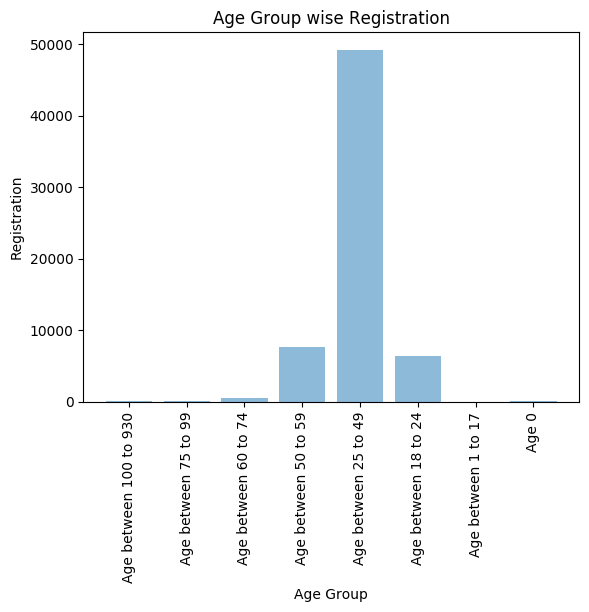

In [0]:
distwise_reg = df1.groupby("age").agg({"regdid": pd.Series.nunique})
agewisereg=distwise_reg.sort_values(by=['regdid'])
agegroup_df = pd.DataFrame(columns=['agegroup', 'agecount'])
agewisereg=agewisereg.sort_values(by=['age'])
nmaxagemore100 =0
nmaxagemore75to100 =0
nmaxagemore50to60 =0
nmaxagemore60to75 =0
nmaxagemore25to50 =0
nmaxagemore18to25 =0
nmaxagemore1to18 =0
nmaxage0 =0
for index1, row in agewisereg.iterrows():
      # print(str(int(index1)).ljust(50), str(row['regdid']))
  if index1>100:
    nmaxagemore100=nmaxagemore100+row['regdid']
  elif (index1>=75 and index1<=100):
    nmaxagemore75to100=nmaxagemore75to100+row['regdid']
  elif (index1>=50 and index1<60):
    nmaxagemore50to60=nmaxagemore50to60+row['regdid']
  elif (index1>=60 and index1<75):
    nmaxagemore60to75=nmaxagemore60to75+row['regdid']
  elif (index1>=25 and index1<50):
    nmaxagemore25to50=nmaxagemore25to50+row['regdid']
  elif (index1>=18 and index1<25):
    nmaxagemore18to25=nmaxagemore18to25+row['regdid']
  elif (index1>=1 and index1<18):
    nmaxagemore1to18=nmaxagemore1to18+row['regdid']
  elif (index1==0):
    nmaxage0=nmaxage0+row['regdid']
  else:
    nmaxage0=nmaxage0+row['regdid']
agegroup_df = agegroup_df.append({'agegroup': 'Age between 100 to 930', 'agecount':nmaxagemore100}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 75 to 99', 'agecount':nmaxagemore75to100}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 60 to 74', 'agecount':nmaxagemore60to75}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 50 to 59', 'agecount':nmaxagemore50to60}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 25 to 49', 'agecount':nmaxagemore25to50}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 18 to 24', 'agecount':nmaxagemore18to25}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age between 1 to 17', 'agecount':nmaxagemore1to18}, ignore_index=True)
agegroup_df = agegroup_df.append({'agegroup': 'Age 0', 'agecount':nmaxage0}, ignore_index=True)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects = agegroup_df['agegroup']
y_pos = np.arange(len(objects))
performance = agegroup_df['agecount']
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Registration')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.title('Age Group wise Registration')
plt.show()


**Observations :**
  
*   Maximum Patient found age group between 25 to 49



**Age wise Registration Details Count**

In [0]:
import pandas as pd
distwise_reg = df1.groupby("age").agg({"regdid": pd.Series.nunique})
agewisereg=distwise_reg.sort_values(by=['regdid'])
print(str('Age').ljust(50), 'Age wise count')
print('------------------------------------------------------------------')
agewisereg=agewisereg.sort_values(by=['age'])
for index1, row in agewisereg.iterrows():
    print(str(int(index1)).ljust(50), str(row['regdid']))


Age                                                Age wise count
------------------------------------------------------------------
0                                                  108
2                                                  1
18                                                 166
19                                                 528
20                                                 797
21                                                 1009
22                                                 1136
23                                                 1239
24                                                 1563
25                                                 1919
26                                                 1580
27                                                 1675
28                                                 1939
29                                                 1934
30                                                 3272
31                                

In [0]:
df1.head()

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,fullname,mobile,age,gender,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
2,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,9.0,Congenital Abnormality,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
3,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,Amruta Sambhaji Shingate,9923966540.0,29.0,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,1.0,Asthama,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
4,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,Amruta Sambhaji Shingate,9923966540.0,29.0,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,10.0,Gastrointestinal Ulcer,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision


**District wise Patients that take alcohol,smoking,tobaco,drug**

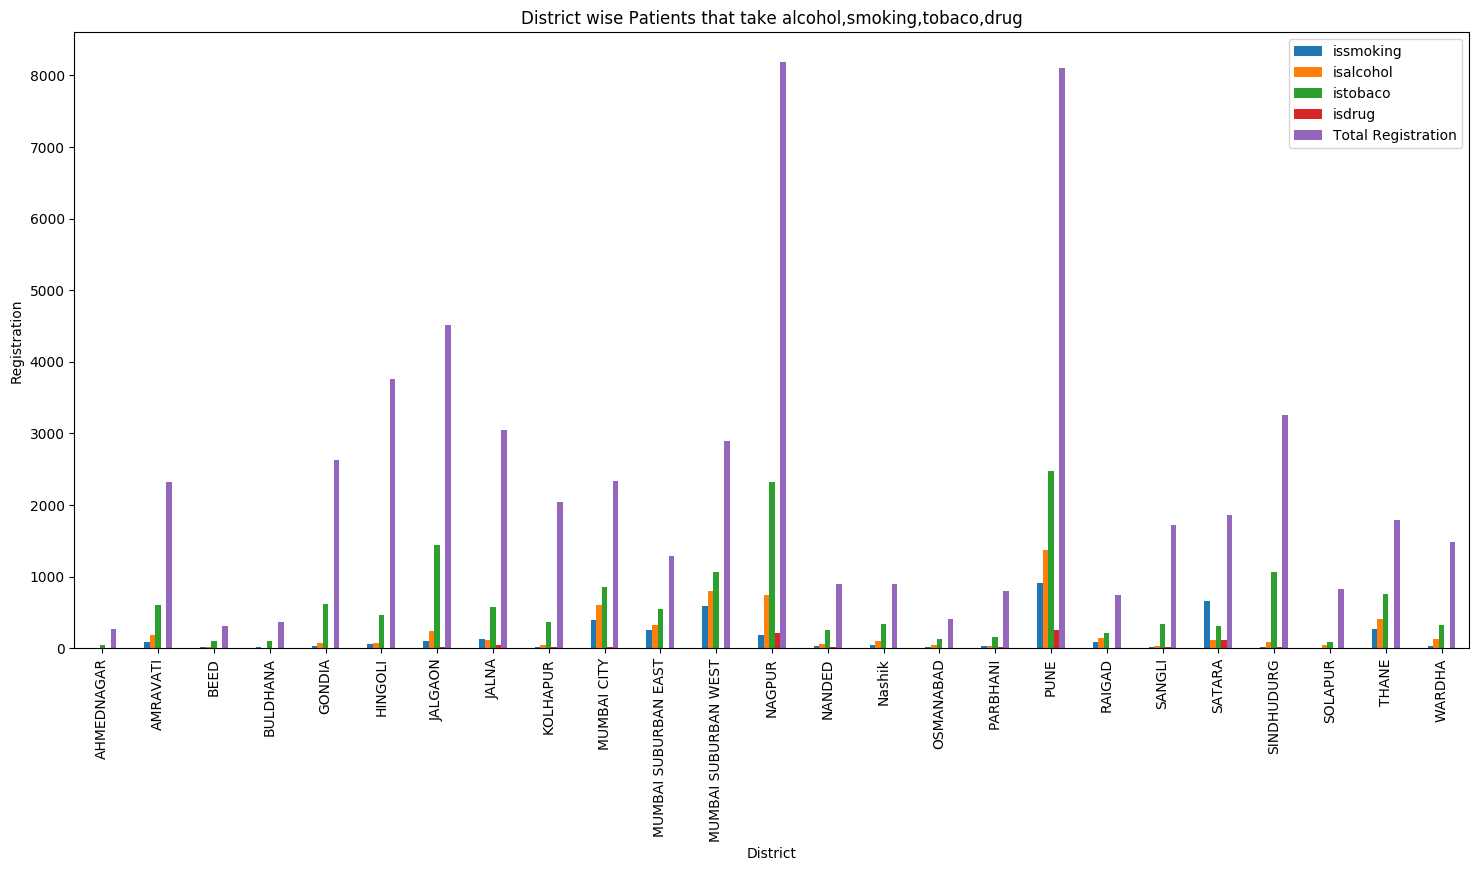

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_tot = df1.groupby(['distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_tot = distwise_tot.reset_index()
distwise_issmoking = df1[df1['issmoking']=='Yes'].groupby(['issmoking','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_issmoking = distwise_issmoking.reset_index()
distwise_isalcohol = df1[df1['isalcohol']=='Yes'].groupby(['isalcohol','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_isalcohol = distwise_isalcohol.reset_index()
distwise_istobaco = df1[df1['istobaco']=='Yes'].groupby(['istobaco','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_istobaco = distwise_istobaco.reset_index()
distwise_isdrug = df1[df1['isdrug']=='Yes'].groupby(['isdrug','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_isdrug = distwise_isdrug.reset_index()
distwise_issmoking.drop("issmoking", axis=1, inplace=True)
distwise_issmoking.rename(columns={'regdid': 'issmoking'}, inplace=True)
distwise_isalcohol.drop("isalcohol", axis=1, inplace=True)
distwise_isalcohol.rename(columns={'regdid': 'isalcohol'}, inplace=True)
distwise_istobaco.drop("istobaco", axis=1, inplace=True)
distwise_istobaco.rename(columns={'regdid': 'istobaco'}, inplace=True)
distwise_isdrug.drop("isdrug", axis=1, inplace=True)
distwise_isdrug.rename(columns={'regdid': 'isdrug'}, inplace=True)
distwise_tot.rename(columns={'regdid': 'Total Registration'}, inplace=True)
result = pd.merge(distwise_issmoking, distwise_isalcohol, on='distname')
result = pd.merge(result,distwise_istobaco, on='distname')
result = pd.merge(result,distwise_isdrug, on='distname')
result = pd.merge(result,distwise_tot, on='distname')
plt.rcParams['figure.figsize'] =[18,8]
import pandas as pd
import matplotlib.pyplot as plt
ax = result.plot.bar(x='distname', rot=0)
plt.ylabel('Registration')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.title('District wise Patients that take alcohol,smoking,tobaco,drug')
plt.show()

**Observations :**

*   Nagpur, Pune and jalgaon district patients that taking max alcohol,smoking,tobaco,drug'






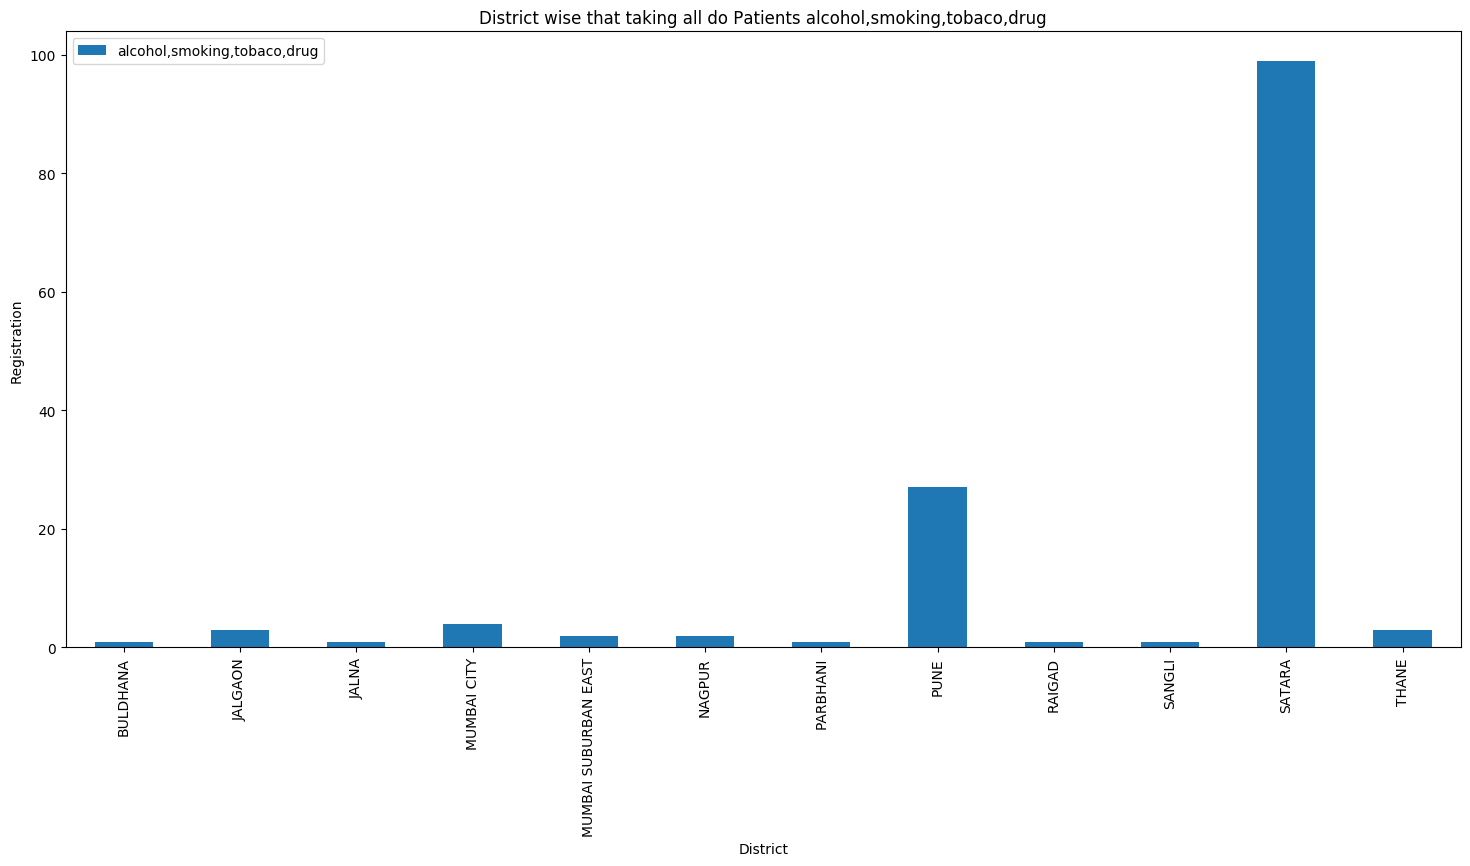

In [0]:
distwise_tot = df1.groupby(['distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_tot = distwise_tot.reset_index()
distwise_issmoking = df1[(df1['issmoking']=='Yes') & (df1['isalcohol']=='Yes')  & (df1['istobaco']=='Yes') & (df1['isdrug']=='Yes')].groupby(['issmoking','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_issmoking = distwise_issmoking.reset_index()
distwise_issmoking.drop("issmoking", axis=1, inplace=True)

distwise_issmoking.rename(columns={'regdid': 'alcohol,smoking,tobaco,drug'}, inplace=True)
plt.rcParams['figure.figsize'] =[18,8]
import pandas as pd
import matplotlib.pyplot as plt
ax = distwise_issmoking.plot.bar(x='distname', rot=0)
plt.ylabel('Registration')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.title('District wise that taking all do Patients alcohol,smoking,tobaco,drug')
plt.show()

**Observations :**

Satara district that taking all do Patients alcohol,smoking,tobaco,drug.

**Function for age groups wise Generate csv file**

In [0]:
from google.colab import files
from pandas import DataFrame
def fn_age_groupwisecsv_generate(start_age,end_age,filename):
  df =DataFrame()
  agebetweendf = (df1['age'] >= start_age) & (df1['age'] <= end_age)
  dictionary = {}
  for index, row in df1.loc[agebetweendf].iterrows():
    dictionary= ({'campno' : row['campno'], 'regdid' : row['regdid'], 'fullname' : row['fullname'],'age' :row["age"]} )
    df = df.append(dictionary, ignore_index=True)
  df=df.drop_duplicates()
  df = df.dropna(axis = 0)
  df.to_csv(filename+'.csv')
  files.download(filename+'.csv')


**Generate CSV - Age between 101 to 930**

In [0]:
fn_age_groupwisecsv_generate(101,930,'agebetween101to930')

**Generate CSV - Age between 76 to 100**

In [0]:
fn_age_groupwisecsv_generate(76,100,'agebetween76to100')

**Generate CSV - Age between 66 to 75**

In [0]:
fn_age_groupwisecsv_generate(66,75,'agebetween66to75')

**Generate CSV - Age between 1 to 17**

In [0]:
fn_age_groupwisecsv_generate(1,17,'agebetween0to17')

Generate CSV - Age 0

In [0]:
fn_age_groupwisecsv_generate(0,0,'age0')

**Generate CSV file selecte min and max age**

In [99]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Generate CSV Age group wise!")
output = widgets.Output()
min_age = "1" #@param ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","80","90","100","150","500","1000"]
max_age = "17" #@param ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","80","90","100","150","500","1000"]
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    fn_age_groupwisecsv_generate(int(min_age),int(max_age),'agebetween'+min_age+'to'+max_age)

button.on_click(on_button_clicked)
display(button, output)

Button(description='Generate CSV Age group wise!', style=ButtonStyle())

Output()

**Construcution Worker's Health Data - District wise gender data**

In [0]:
%%html 
<marquee style='width: 100%; color: blue;'><b>District and Gender wise Registration Count!</b></marquee>

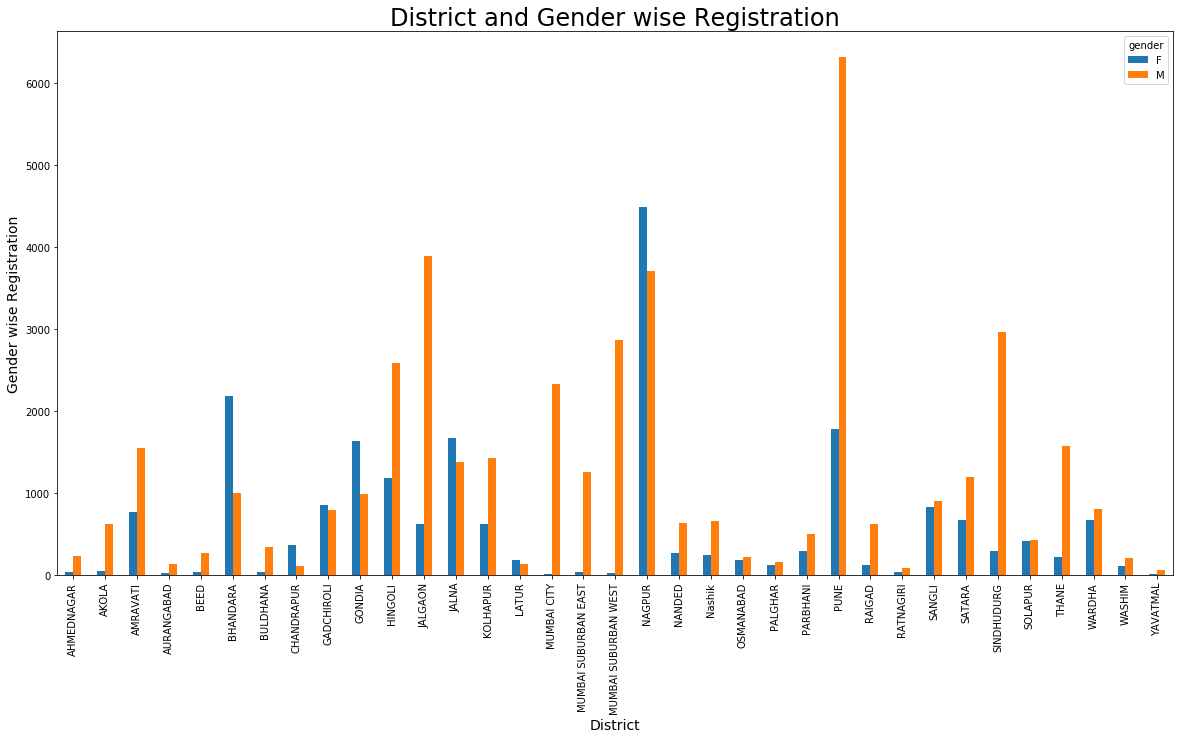

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1.groupby(['gender','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['distname'])
distwise_reg = distwise_reg.pivot_table('regdid', ['distname'], 'gender')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[20,10]
df = pd.DataFrame(distwise_reg)

df.plot(x="distname", y=['F','M'], kind="bar")
plt.xticks(rotation=90)
plt.title('District and Gender wise Registration',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Gender wise Registration',fontsize=14)
plt.show()



**Droping data from datafram  "Age between 100 to 930"**

In [0]:
df1.drop(df1[df1['age'] >100].index, inplace = True) 

**After deleting wrong data, verified age data**

deleted "age between 100 to 930" data

In [0]:
agerangebetween100to1000()

                     Age Group Data
Age                                                Age wise count
------------------------------------------------------------------
Age between 100 to 930                            0
Age between 75 to 99                              23
Age between 60 to 74                              500
Age between 50 to 59                              7643
Age between 25 to 49                              49226
Age between 18 to 24                              6438
Age between 1 to 17                               1
Age 0                                             108


**Gender data wrong found (2 Records)**


In [0]:
df1[df1['gender']=='nan']

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,fullname,mobile,age,gender,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
544594,213,CAMP_490_0000096,Sr No 27/1/1| Sr No 27/1/13| P No 13|14|15|16|...,2019-09-03,490,PUNE,547716,654456,NaN,nan,NaN,nan,NaN,CRITICAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Audio Screening Test,Deafness,Deafness,Lung Functioin Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-Sep-19,490.0,NaN,NaN,NaN,NaN,3.0,Physical Examination,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544595,213,CAMP_490_0000096,Sr No 27/1/1| Sr No 27/1/13| P No 13|14|15|16|...,2019-09-03,490,PUNE,547717,258852,NaN,nan,NaN,nan,NaN,CRITICAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Audio Screening Test,Deafness,Deafness,Lung Functioin Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-Sep-19,490.0,NaN,NaN,NaN,NaN,3.0,Physical Examination,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.  District wise 
          Gender wise Registration
          Health status wise Registration
          District wise Registration
          District wise Camp

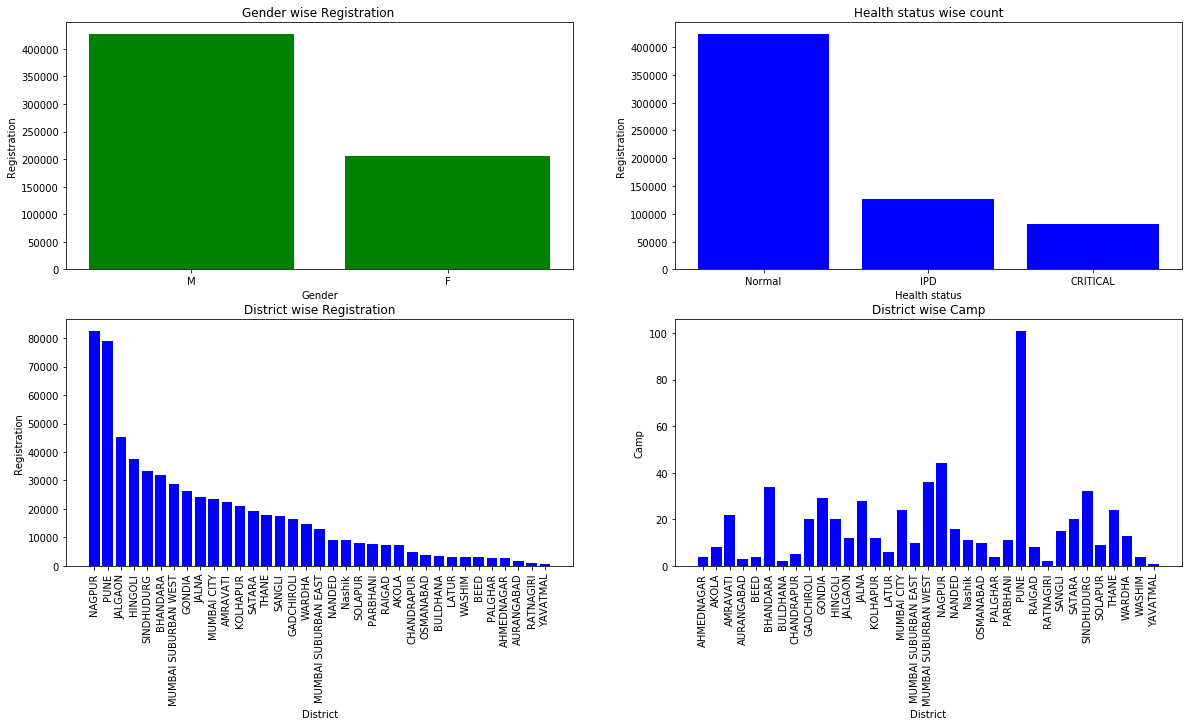

In [21]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
plt.rcParams['figure.figsize'] =[20,10]


fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


healthhcount = df1['health_status'].value_counts().to_dict()
groupnamecount = df1['gender'].value_counts().to_dict()
distnamecount = df1['distname'].value_counts().to_dict()
distwise_reg = df1.groupby("distname").agg({"camplocation": pd.Series.nunique}).reset_index()


ax1.title.set_text('Gender wise Registration ')
service_value1=groupnamecount.values()
service_keys1=groupnamecount.keys()
ax1.set_xlabel('Gender')
ax1.set_ylabel('Registration')
ax1.bar(service_keys1,service_value1, color = 'green')


ax2.title.set_text('Health status wise count')
service_value1=healthhcount.values()
service_keys1=healthhcount.keys()
ax2.set_xlabel('Health status')
ax2.set_ylabel('Registration')
ax2.bar(service_keys1,service_value1, color = 'blue')



ax3.title.set_text('District wise Registration')
distnamecount_value1=distnamecount.values()
distnamecount_keys1=distnamecount.keys()
ax3.set_xlabel('District')
ax3.set_ylabel('Registration')
ax3.bar(distnamecount_keys1,distnamecount_value1, color = 'blue')
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)


ax4.title.set_text('District wise Camp')
distnamecount_value1=distwise_reg['camplocation']
distnamecount_keys1=distwise_reg['distname']
ax4.set_xlabel('District')
ax4.set_ylabel('Camp')
ax4.bar(distnamecount_keys1,distnamecount_value1, color = 'blue')
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)


**Observation**

     There ware more camps in Pune but registration was low as compare to Nagpur



**District wise Maximum/Minimum Registration Count**

In [0]:
distwise_reg = df1.groupby("distname").agg({"regdid": pd.Series.nunique})
distwise_reg.sort_values(by=['regdid'])
print(str('District').ljust(25),'Min/Max (Resistration)')
print(str('---------------').ljust(25),'-----------------------')
print(str(distwise_reg[distwise_reg.regdid == distwise_reg.regdid.max()].index[0]).ljust(25),distwise_reg[distwise_reg.regdid == distwise_reg.regdid.max()].values[0][0])
print(str(distwise_reg[distwise_reg.regdid == distwise_reg.regdid.min()].index[0]).ljust(25),distwise_reg[distwise_reg.regdid == distwise_reg.regdid.min()].values[0][0])

District                  Min/Max (Resistration)
---------------           -----------------------
NAGPUR                    8190
YAVATMAL                  64


**District and health status wise data**

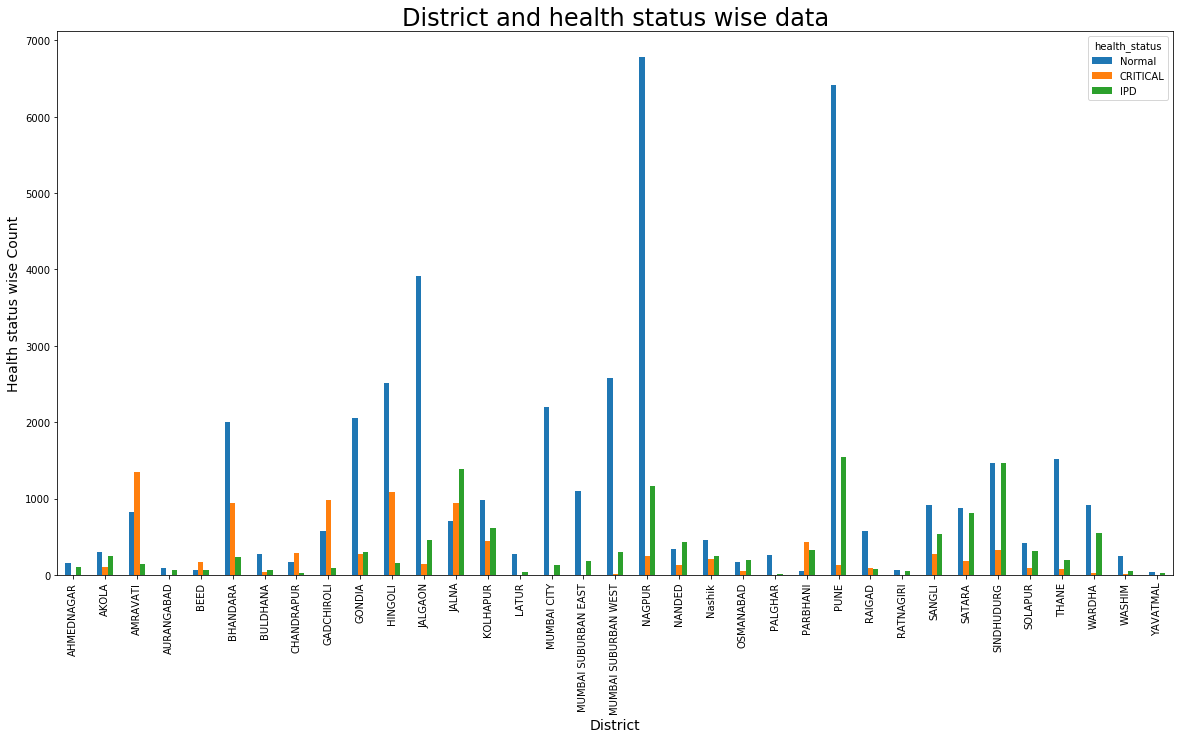

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1.groupby(['health_status','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['distname'])
distwise_reg = distwise_reg.pivot_table('regdid', ['distname'], 'health_status')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[20,10]
df = pd.DataFrame(distwise_reg)

df.plot(x="distname", y=['Normal','CRITICAL','IPD'], kind="bar")
plt.xticks(rotation=90)
plt.title('District and health status wise data',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Health status wise Count',fontsize=14)
plt.show()

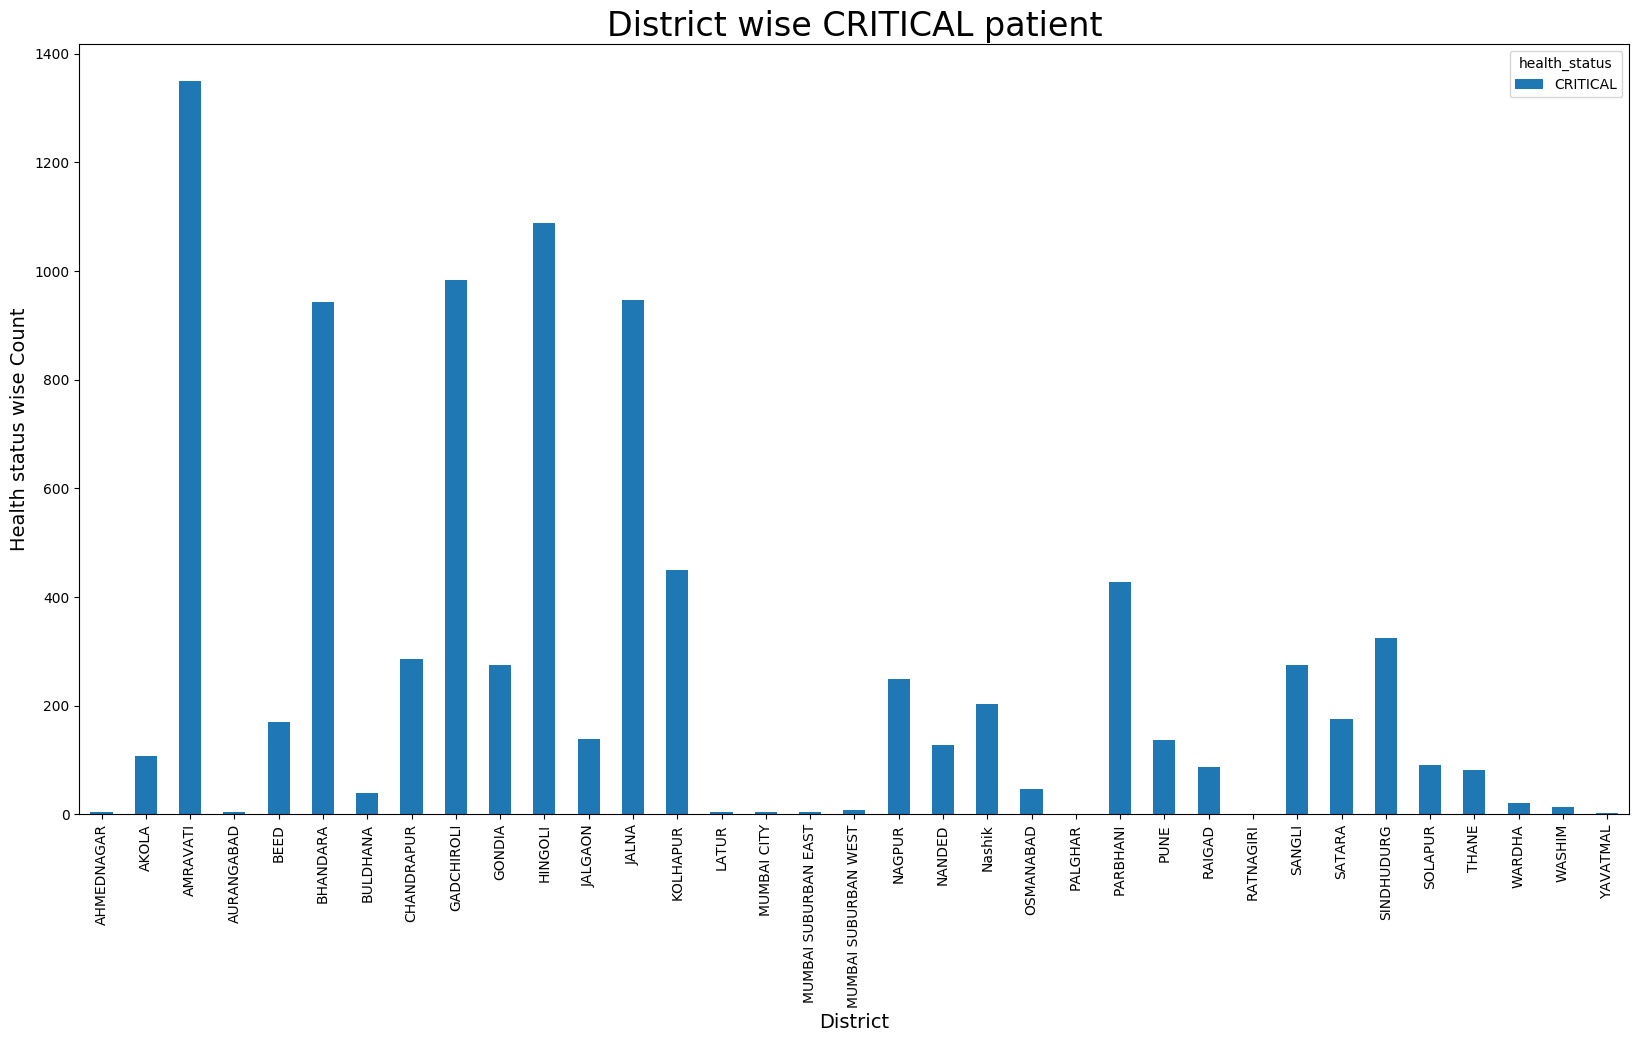

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1.groupby(['health_status','distname']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['distname'])
distwise_reg = distwise_reg.pivot_table('regdid', ['distname'], 'health_status')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[20,10]
df = pd.DataFrame(distwise_reg)

df.plot(x="distname", y=['CRITICAL'], kind="bar")
plt.xticks(rotation=90)
plt.title('District wise CRITICAL patient',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Health status wise Count',fontsize=14)
plt.show()

**Observation**

   Amravati distict has maximum critical health status

   Ratnagiri has lowest critical health status and Palghar has 0

**Disease Result**


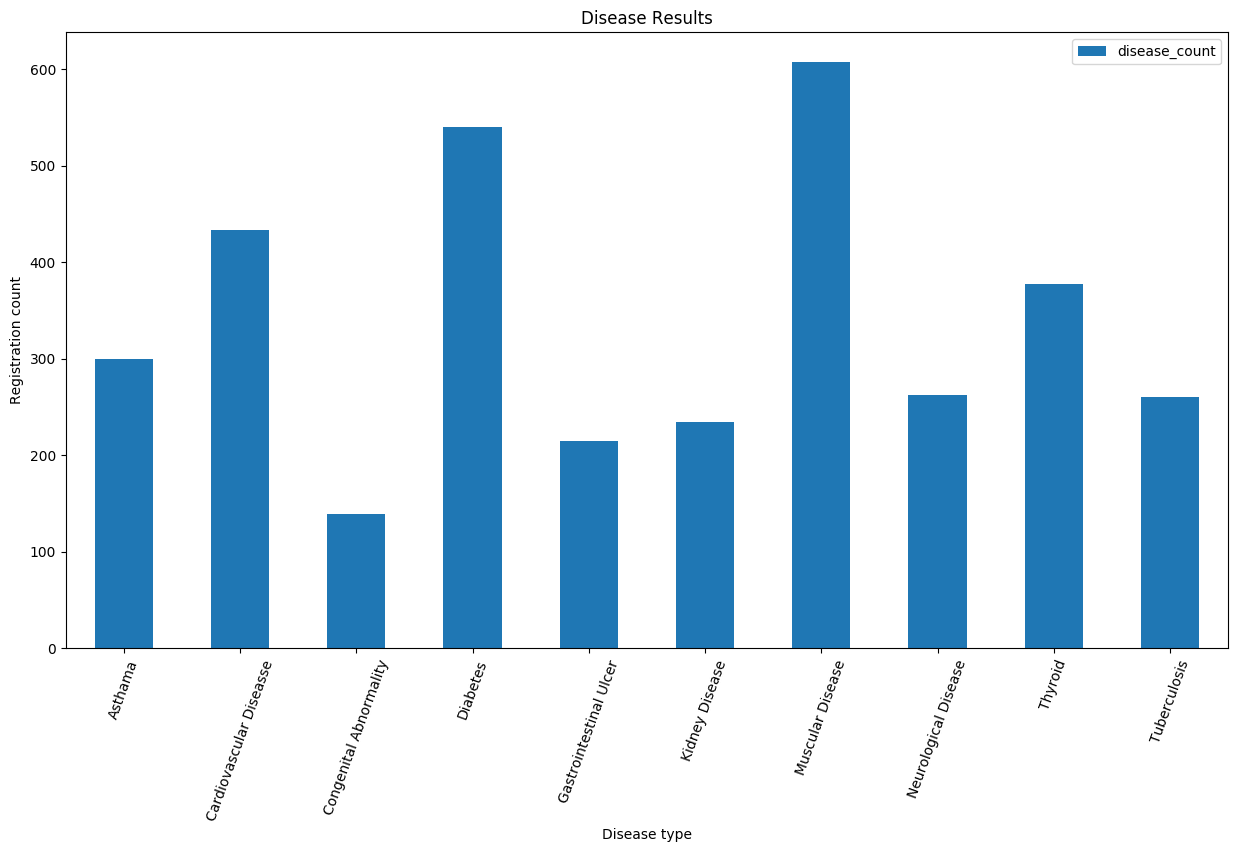

In [0]:
disease = df1[(df1['disease_status']=='Yes') ].groupby(['disease_status','diseasename']).agg({"regdid": pd.Series.nunique}).apply(list)
disease = disease.reset_index()
disease.drop("disease_status", axis=1, inplace=True)
disease.rename(columns={'regdid': 'disease_count'}, inplace=True)
plt.rcParams['figure.figsize'] =[15,8]
import pandas as pd
import matplotlib.pyplot as plt
ax = disease.plot.bar(x='diseasename', rot=0)
plt.ylabel('Registration count')
plt.xlabel('Disease type')
plt.xticks(rotation=70)
plt.title('Disease Results')
plt.show()


**Observation**


1.   Max patient found Muscular Disease and min found Congenital Abnormality

**Gender wise Disease Result**

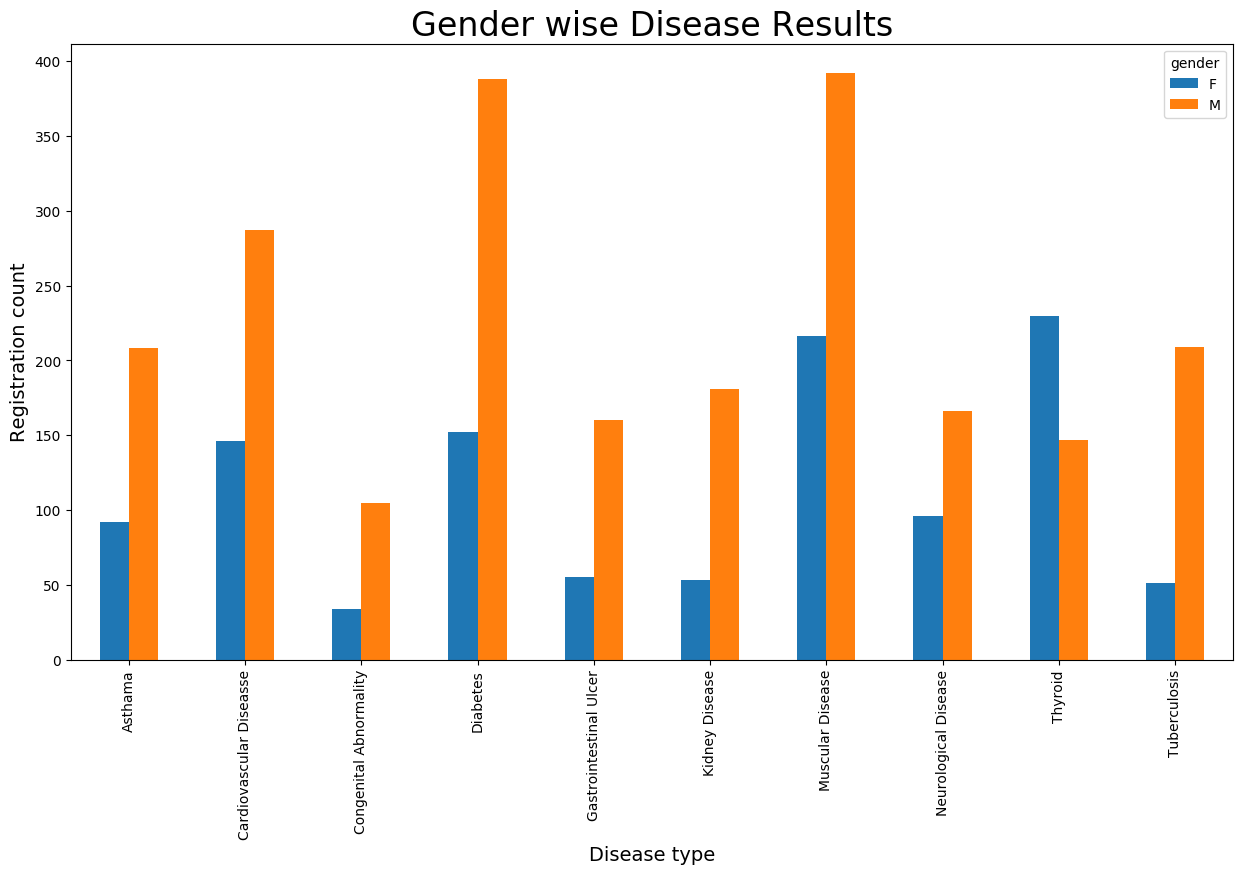

In [0]:
# disease = df1[(df1['disease_status']=='Yes') ].groupby(['disease_status','diseasename','gender']).agg({"regdid": pd.Series.nunique}).apply(list)
# disease = disease.reset_index()
# disease



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

distwise_reg = df1[(df1['disease_status']=='Yes') ].groupby(['disease_status','diseasename','gender']).agg({"regdid": pd.Series.nunique}).apply(list)
distwise_reg = distwise_reg.reset_index()
distwise_reg=distwise_reg.sort_values(by=['diseasename'])
distwise_reg = distwise_reg.pivot_table('regdid', ['diseasename'], 'gender')
distwise_reg=distwise_reg.reset_index()

plt.rcParams['figure.figsize'] =[15,8]
df = pd.DataFrame(distwise_reg)

df.plot(x="diseasename", y=['F','M'], kind="bar")
plt.xticks(rotation=90)
plt.title('Gender wise Disease Results',fontsize=24)
plt.xlabel('Disease type',fontsize=14)
plt.ylabel('Registration count',fontsize=14)
plt.show()

**Observation**


1.   From this grauph we know that male patient get max disease.



In [0]:
df1.head()

,campid,campno,camplocation,campdate,distlgdcode,distname,regdid,regdno,fullname,mobile,age,gender,docremark,health_status,bmi,weight_kgs,height_cms,bloodsugar_f,bloodsugar_pp,bloodsugar_r,pulserate,testname,right_remark,left_remark,testname_lft,fev1,fevi_fvc,pef,fef_25_75,fivc,pif,fet,result,diseaseid,diseasename,disease_status,campdate_ph,distlgdcode_ph,isalcohol,issmoking,istobaco,isdrug,phy_exam_testid,phy_exam_testname,phy_exam_remark,testid_vi,testname_vi,diesease_injury_evidence_right_vi,diesease_injury_evidence_left_vi,other_remark_vi,suggestion_vi,finalremark_vi,wearingglasses_vi,leftremark_vi,rightremark_vi,nearvisionremark_vi
0,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,7.0,Tuberculosis,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
1,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,8.0,Cardiovascular Diseasse,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
2,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497742,131380003406,Manisha Suhas Nikam,9967911264.0,35.0,F,patient is normal,Normal,22.3674,51.0,151.0,117.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,2.552,0.852,3.285,2034.013,2.557,3.364,0.027,NORMAL,9.0,Congenital Abnormality,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,No,Normal Vision,Normal Vision,Normal Vision
3,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,Amruta Sambhaji Shingate,9923966540.0,29.0,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,1.0,Asthama,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision
4,274,CAMP_493_0000003,varadshilp appt flat 3| manglamurti colony| Sa...,2019-09-11,493,SANGLI,497744,131390043378,Amruta Sambhaji Shingate,9923966540.0,29.0,F,patient is normal,Normal,24.3865,64.0,162.0,120.0,139.0,NaN,NaN,Audio Screening Test,Normal Hearing,Normal Hearing,Lung Functioin Test,3.028,0.926,25.185,2493.410,2.225,3.244,0.022,NORMAL,10.0,Gastrointestinal Ulcer,NO,11-Sep-19,493.0,NO,NO,NO,NO,3.0,Physical Examination,Normal,6.0,Vision Screening,Normal,Normal,NaN,NaN,1.0,Yes,Normal Vision,Normal Vision,Normal Vision


In [155]:
import numpy as np
bloodsugar_df = pd.DataFrame(columns=['blood_sugar_level', 'bloodsugar_f','bloodsugar_pp','bloodsugar_r'])
# bloodsugar_distname_normaldf = pd.DataFrame(columns=['distname', 'bloodsugar_f'])

df1['bloodsugar_f'] = df1['bloodsugar_f'].replace('nan', np.nan).fillna(0)
df1['bloodsugar_pp'] = df1['bloodsugar_pp'].replace('nan', np.nan).fillna(0)
df1['bloodsugar_r'] = df1['bloodsugar_r'].replace('nan', np.nan).fillna(0)


fastnormal_70_100 =0
fastpre_diabetic_101_125 =0
fastdiabetic_126more =0
fastothers=0

aftermealnormal_170_200 =0
aftermealpre_diabetic_190_230 =0
aftermealdiabetic_220_300 =0
aftermealothers=0

randomnormal_120_140 =0
randompre_diabetic_140_200 =0
randomdiabetic_220more =0
randomothers=0


others =0
for index1, row in df1.iterrows():
  if (int(row['bloodsugar_f'])>=70 and int(row['bloodsugar_f'])<=100):
    fastnormal_70_100=fastnormal_70_100+1
    # bloodsugar_distname_normaldf = bloodsugar_distname_normaldf.append({'distname': row['distname'], 'bloodsugar_f': 1}, ignore_index=True)
  elif (row['bloodsugar_f']>=101 and row['bloodsugar_f']<=125):
    fastpre_diabetic_101_125=fastpre_diabetic_101_125+1
  elif (row['bloodsugar_f']>=126):
    fastdiabetic_126more=fastdiabetic_126more+1
  else:
    fastothers=fastothers+1

  if (int(row['bloodsugar_pp'])>=170 and int(row['bloodsugar_pp'])<=200):
    aftermealnormal_170_200=aftermealnormal_170_200+1
  elif (row['bloodsugar_pp']>=190 and row['bloodsugar_pp']<=230):
    aftermealpre_diabetic_190_230=aftermealpre_diabetic_190_230+1
  elif (row['bloodsugar_pp']>=220 and row['bloodsugar_pp']<=300):
    aftermealdiabetic_220_300=aftermealdiabetic_220_300+1
  else:
    aftermealothers=aftermealothers+1

  if (int(row['bloodsugar_r'])>=120 and int(row['bloodsugar_r'])<=140):
    randomnormal_120_140=randomnormal_120_140+1
  elif (row['bloodsugar_r']>=140 and row['bloodsugar_r']<=200):
    randompre_diabetic_140_200=randompre_diabetic_140_200+1
  elif (row['bloodsugar_r']>=200 ):
    randomdiabetic_220more=randomdiabetic_220more+1
  else:
    randomothers=randomothers+1

bloodsugar_df = bloodsugar_df.append({'blood_sugar_level': 'Normal', 'bloodsugar_f': fastnormal_70_100,'bloodsugar_pp':aftermealnormal_170_200,'bloodsugar_r':randomnormal_120_140}, ignore_index=True)
bloodsugar_df = bloodsugar_df.append({'blood_sugar_level': 'Pre Diabetic ', 'bloodsugar_f': fastpre_diabetic_101_125,'bloodsugar_pp':aftermealpre_diabetic_190_230,'bloodsugar_r':randompre_diabetic_140_200}, ignore_index=True)
bloodsugar_df = bloodsugar_df.append({'blood_sugar_level': 'Diabetic', 'bloodsugar_f': fastdiabetic_126more,'bloodsugar_pp':aftermealdiabetic_220_300,'bloodsugar_r':randomdiabetic_220more}, ignore_index=True)
# bloodsugar_df = bloodsugar_df.append({'blood_sugar_level': 'other', 'bloodsugar_f': fastothers,'bloodsugar_pp':aftermealothers,'bloodsugar_r':randomothers}, ignore_index=True)

bloodsugar_df

,blood_sugar_level,bloodsugar_f,bloodsugar_pp,bloodsugar_r
0,Normal,308436,24240,14832
1,Pre Diabetic,197447,5569,9980
2,Diabetic,62284,5190,2161


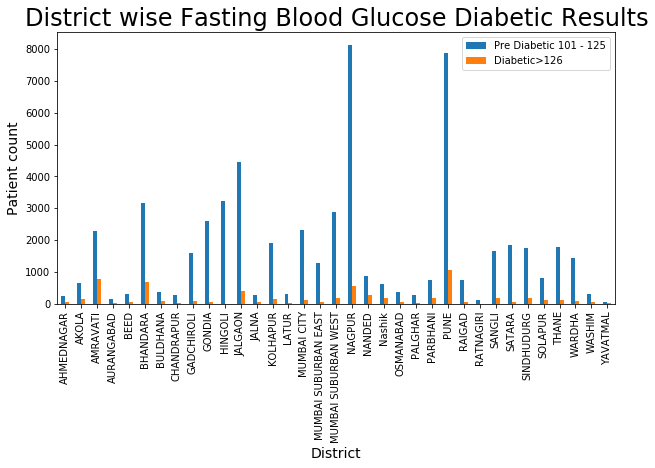

In [161]:
bloodsugar_predf = df1[(df1['bloodsugar_f']) > 101 & (df1['bloodsugar_f'] <=125)].groupby(['distname']).agg({"regdid": pd.Series.nunique}).apply(list)
bloodsugar_predf = bloodsugar_predf.reset_index()
bloodsugar_predf.rename(columns={'regdid': 'Pre Diabetic 101 - 125'}, inplace=True)

bloodsugar_diabeticdf = df1[(df1['bloodsugar_f']) >=126].groupby(['distname']).agg({"regdid": pd.Series.nunique}).apply(list)
bloodsugar_diabeticdf = bloodsugar_diabeticdf.reset_index()
bloodsugar_diabeticdf.rename(columns={'regdid': 'Diabetic>126'}, inplace=True)

fastblooddf = pd.merge(bloodsugar_predf,
                 bloodsugar_diabeticdf[['distname',  'Diabetic>126']],
                 on=['distname'],
                 how='left')
plt.rcParams['figure.figsize'] =[10,5]
df = pd.DataFrame(fastblooddf)

df.plot(x="distname", y=['Pre Diabetic 101 - 125','Diabetic>126'], kind="bar")
plt.xticks(rotation=90)
plt.title('District wise Fasting Blood Glucose Diabetic Results',fontsize=24)
plt.xlabel('District',fontsize=14)
plt.ylabel('Patient count',fontsize=14)
plt.show()

Observation

Fasting Blood Glucose - 
 
      We found maximum **Daibetic** counstruction workers in Pune as well as in Amaravati.
      We found maximum **Pre-Diabetic** counstruction workers in Pune as well as in Nagpur.